# **Classification Algorithms Comparison**

### **File Imports**

The following libraries are used:
- `os` and `PIL` for handling image files
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for machine learning preprocessing, training, and evaluation

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## **Step 1: Loading and Processing the Data**

In this step, the image files are:

- Loaded from the "fashion" directory
- Resized to 48x48 pixels for consistency
- Converted to greyscale and flattened into 1D arrays
- Storeed with their corresponding labels
- Displayed as samples (5 images per category)


#### **Setting Up the Dataset**
- Defines the path to the dataset directory (`fashion`).
- Retrieves and lists all category names (subdirectories) in the dataset.
- Initializes empty lists to store image data (`image_data`) and corresponding labels (`labels`).
- Sets a fixed image size of `48x48` for consistency in preprocessing.


In [74]:
# Path to dataset
dataset_path = "fashion"

# Get list of categories
categories = os.listdir(dataset_path)
print("Categories:", categories)

# Prepare storage for images and labels
image_data = []
labels = []

# Set image size for consistency
image_size = (48, 48)

Categories: ['ankleboot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 'trouser', 'tshirt-top']


#### **Loading and Processing Images**
- Iterates through each category folder in the dataset.
- Opens each image, resizes it to a consistent `48x48` resolution, and converts it to greyscale.
- Flattens the image into a 1D array and stores it in `image_data`, with corresponding labels in `labels`.
- Stores the first 5 images from each category separately for visualization.


In [124]:
# Load images and store first 5 images for visualization
sample_images = {category: [] for category in categories}

for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    # Track number of images processed per category
    count = 0 
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)

        # Open, resize, and convert image to greyscale
        img = Image.open(image_path).convert("L")
        img = img.resize(image_size)
        # Flatten image into 1D array
        img_array = np.array(img).flatten()  

        # Store the image data and corresponding label
        image_data.append(img_array)
        labels.append(label)

        # Store sample images (only first 5 per category)
        if count < 5:
            sample_images[category].append(np.array(img))  # Store raw image for display
            count += 1

#### **Converting Data to NumPy Arrays**
Image data and labels are converted into NumPy arrays for efficient processing.
- `X` contains the flattened greyscale image pixel values.
- `y` contains the corresponding class labels for each image.
- `X.shape`: Displays the total number of images and the number of pixels per image.
- `y.shape`: Displays the total number of labels.
- `len(categories)`: Displays the total number of unique categories in the dataset.


In [76]:
# Convert to NumPy arrays
X = np.array(image_data)
y = np.array(labels)

# Tests
print(f"Number of images and pixel size: {X.shape}")
print(f"Number of labels: {y.shape}")
print(f"Number of catagories: {len(categories)}")

Number of images and pixel size: (70000, 2304)
Number of labels: (70000,)
Number of catagories: 10


#### **Loaded Images Test**
- Sample images (5 per category) are displayed to show that they were loaded, converted and stored correctly.

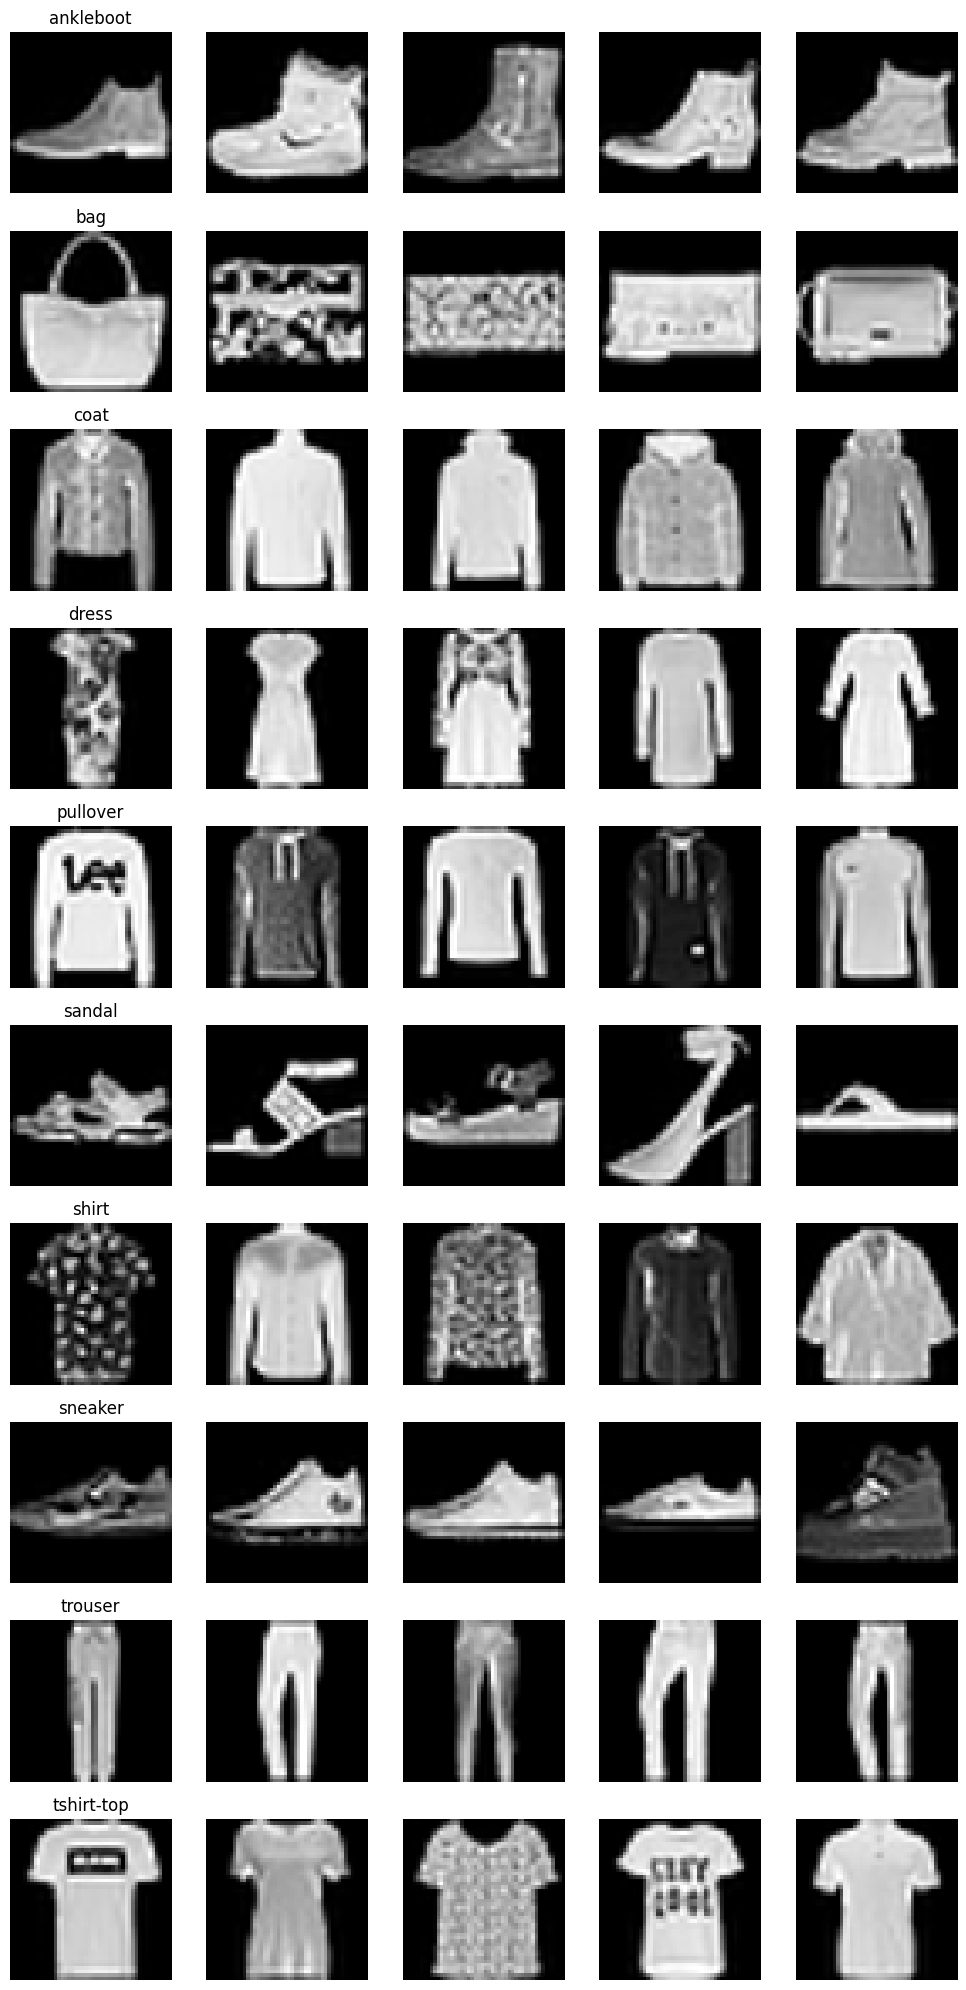

In [77]:
# Display sample images (5 per category)
fig, axes = plt.subplots(len(categories), 5, figsize=(10, len(categories) * 2))

for row, category in enumerate(categories):
    for col in range(5):
        if col < len(sample_images[category]):
            axes[row, col].imshow(sample_images[category][col], cmap="gray")
            axes[row, col].axis("off")
            axes[row, col].set_title(category if col == 0 else "")

plt.tight_layout()
plt.show()

## **Step 2: Normalising the Data**

In this step,

- Image pixel values are normalised using MinMaxScaler to a range of [0,1]
- Histograms before and after scaling are plotted for visualization

### **Normalising Pixel Values**
- `MinMaxScaler()` is used to scale pixel values from `[0, 255]` to the range `[0, 1]`.
- `fit_transform(X)` applies scaling to the entire dataset, ensuring all pixel values are normalised.
- This normalisation helps improve model performance by ensuring consistent input ranges.

In [78]:
# Normalise pixel values to range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#### **Testing**

Confirms the normalisation has completed successfully.

In [79]:
print(f"Min pixel value after scaling: {X.min()}")
print(f"Max pixel value after scaling: {X.max()}")
print(f"Min pixel value after scaling: {X_scaled.min()}")
print(f"Max pixel value after scaling: {X_scaled.max()}")
print("Data normalized successfully!")

Min pixel value after scaling: 0
Max pixel value after scaling: 255
Min pixel value after scaling: 0.0
Max pixel value after scaling: 1.0
Data normalized successfully!


### **Histograms of Pixel Distribution**
This visualisation compares the distribution of pixel intensity values before and after MinMax scaling:

- **Left Plot (Before Scaling, 0-255 Range)**:
  - The majority of pixel values are concentrated near 0, indicating that most pixels in the dataset are dark.

- **Right Plot (After Scaling, 0-1 Range)**:
  - The overall shape of the distribution remains the same, meaning the relative frequency of pixel values is unchanged.
  - The data is rescaled so that the minimum pixel value becomes `0` and the maximum becomes `1`.

**Key Takeaway:**  
MinMax scaling normalizes the pixel values while preserving their original distribution, which helps machine learning models process the data efficiently without affecting the relationships between pixel intensities.


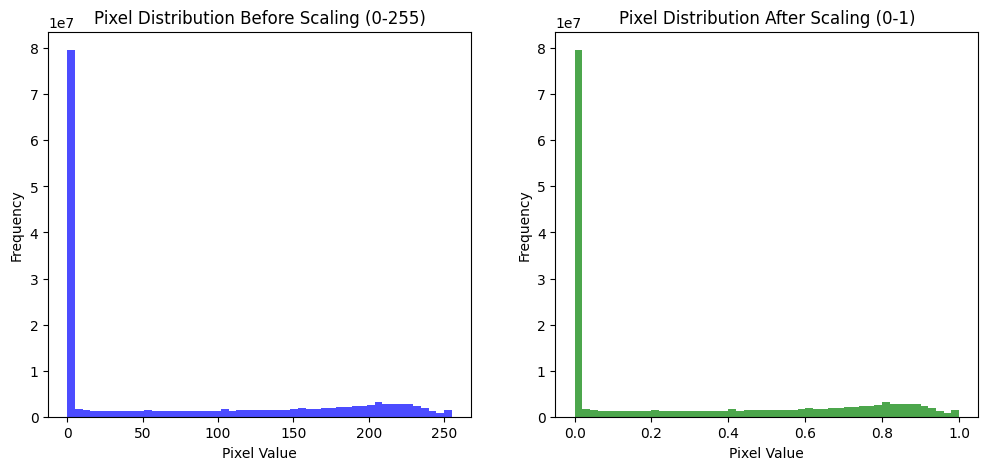

In [80]:
plt.figure(figsize=(12, 5))

# Histogram before scaling
plt.subplot(1, 2, 1)
plt.hist(X.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Distribution Before Scaling (0-255)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Histogram after scaling
plt.subplot(1, 2, 2)
plt.hist(X_scaled.flatten(), bins=50, color='green', alpha=0.7)
plt.title("Pixel Distribution After Scaling (0-1)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.show()


## **Step 4. Spliting Data into Training, Validation and Testing Sets**

In this step, the dataset is split into:
- Training set (70% of the data)
- Validation set (15% of the data)
- Test set (15% of the data)
- Stratified sampling ensures an equal class distribution in each set

There are three different splits, one basic, one using PCA, and one using both PCA and Standard Scaling.


### **Setting Random Seed for Reproducibility**
- The `student_id` (409920) is used as a random seed to ensure consistent and reproducible results across different runs.
- `np.random.seed(student_id)` sets the seed for NumPy’s random number generator, ensuring that any randomised operations (such as dataset splitting) produce the same results each time the code is executed.
- This is important for experiments and model evaluation, as it ensures that train-test splits remain identical, allowing for fair comparisons between models.

In [ ]:
# Set seed for reproducibility
student_id = 409920
np.random.seed(student_id)

#### **Split 1: Basic**

Data is split into Training and Other:

- **70%** of the data is assigned to `X_train` and `y_train`.
- **30%** of the data is assigned to `X_other` and `y_other` to be further split.

In [ ]:
# Split dataset into train (70%) and other (30%)
X_train, X_other, y_train, y_other = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=student_id
)

Other data is then split into Validation and Test

- **15%** validation set (`X_valid`, `y_valid`) used for tuning hyperparameters.
- **15%** test set (`X_test`, `y_test`) used for final model evaluation.

In [ ]:
# Split 'other' into validation (15%) and test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_other, y_other, test_size=0.5, stratify=y_other, random_state=student_id
)

#### **Testing**

Checks if image data was correctly split.

In [ ]:
# Print dataset sizes
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Validation set: {X_valid.shape[0]} samples, {X_valid.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")

### **Split 2: PCA with Standard Scaling for SVM**

Data is split into Training and Other:

- **70%** of the data is assigned to `X_train_svm_full` and `y_train_svm_full`.
- **30%** of the data is assigned to `X_other_svm` and `y_other_svm` to be further split.

The training set is further reduced by **50%**, ensuring a balanced subset.
  
The remaining **30%** Other data is also reduced by **50%**, cutting the validation and test sets in half while using `stratify=y` keeping class distributions intact.

This allows training on a smaller dataset while still preserving meaningful validation and test sets.

In [116]:
# Define dataset reduction factors
train_fraction = 0.5  # Reduce training set by 50%
valid_test_fraction = 0.5  # Reduce validation & test sets by 50%

# First split: train vs. other (keeping class balance)
X_train_svm_full, X_other_svm, y_train_svm_full, y_other_svm = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=student_id
)

# Reduce training set further
X_train_svm, _, y_train_svm, _ = train_test_split(
    X_train_svm_full, y_train_svm_full, train_size=train_fraction, stratify=y_train_svm_full, random_state=student_id
)

# Reduce validation & test sets
X_valid_test_svm, _, y_valid_test_svm, _ = train_test_split(
    X_other_svm, y_other_svm, train_size=valid_test_fraction, stratify=y_other_svm, random_state=student_id
)

### **Data Splitting, Scaling, and PCA for SVM**

**Splitting Validation and Test Sets:**  
  - The remaining dataset (`X_valid_test_svm`) is split into validation **(50%)** and test **(50%)** sets while preserving class distribution using `stratify=y_valid_test_svm`.

**Feature Scaling with StandardScaler:**  
  - The training set is standardized to have zero mean and unit variance using `StandardScaler()`.  
  - This step ensures that all features contribute equally to the model, improving SVM performance.

**Dimensionality Reduction with PCA:**  
  - PCA is applied to reduce the dataset to 135 components, using `svd_solver='full'` for optimal performance.
  - This step helps in reducing computation time while retaining important variance in the data.

**Transforming Validation and Test Sets:**  
  - The same `scaler_svm` and `pca_svm` transformations are applied to the validation and test sets, ensuring consistency with the training data.

**Confirmation of PCA Components:**  
  - The number of retained components (135) is printed to verify successful dimensionality reduction.

In [117]:
# Split remaining data into validation and test sets
X_valid_svm, X_test_svm, y_valid_svm, y_test_svm = train_test_split(
    X_valid_test_svm, y_valid_test_svm, test_size=0.5, stratify=y_valid_test_svm, random_state=student_id
)

# Scale using StandardScaler
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)

# PCA with fixed 135 components & optimized solver
pca_svm = PCA(n_components=135, svd_solver='full')
X_train_pca_svm = pca_svm.fit_transform(X_train_scaled_svm)

# Transform validation and test sets
X_valid_pca_svm = pca_svm.transform(scaler_svm.transform(X_valid_svm))
X_test_pca_svm = pca_svm.transform(scaler_svm.transform(X_test_svm))

print(f"Number of PCA components retained for SVM: {pca_svm.n_components_}")

Number of PCA components retained for SVM: 135


In [118]:
# Print dataset sizes
print(f"Training set (SVM PCA): {X_train_pca_svm.shape[0]} samples, {X_train_pca_svm.shape[1]} PCA components")
print(f"Validation set (SVM PCA): {X_valid_pca_svm.shape[0]} samples, {X_valid_pca_svm.shape[1]} PCA components")
print(f"Test set (SVM PCA): {X_test_pca_svm.shape[0]} samples, {X_test_pca_svm.shape[1]} PCA components")

Training set (SVM PCA): 24500 samples, 135 PCA components
Validation set (SVM PCA): 5250 samples, 135 PCA components
Test set (SVM PCA): 5250 samples, 135 PCA components


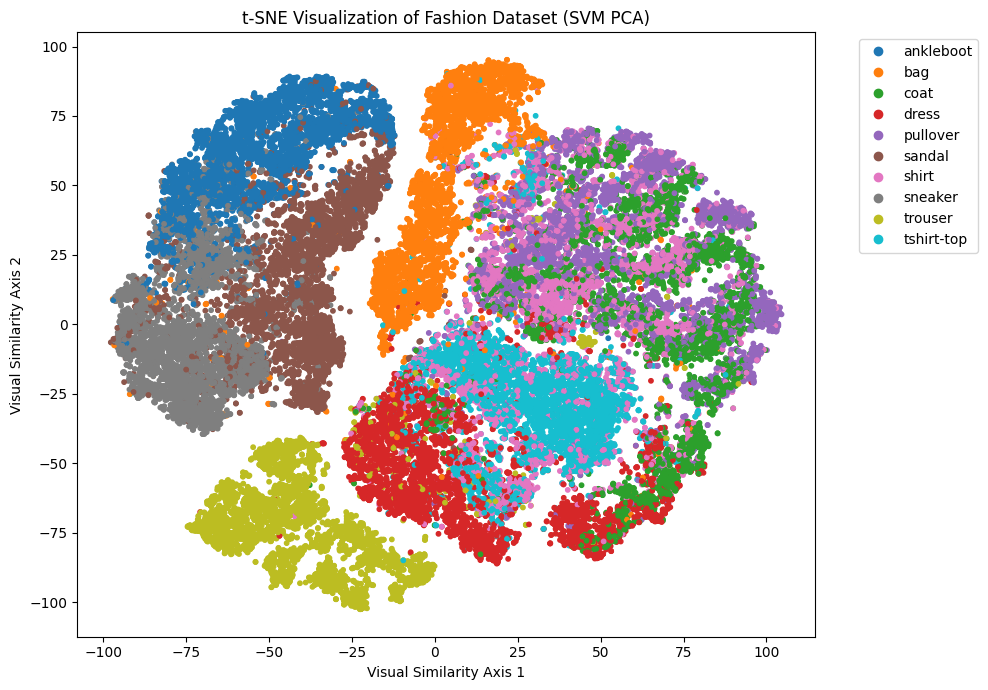

In [107]:
# Reduce SVM PCA data to 2D with t-SNE
subset_size = min(49000, X_train_pca_svm.shape[0])
X_subset_svm = X_train_pca_svm[:subset_size]
y_subset_svm = y_train_svm[:subset_size]

tsne_svm = TSNE(n_components=2, random_state=student_id, perplexity=30)
X_tsne_svm = tsne_svm.fit_transform(X_subset_svm)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne_svm[:, 0], X_tsne_svm[:, 1], c=y_subset_svm, cmap='tab10', s=10)

# Legend
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=categories, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("t-SNE Visualization of Fashion Dataset (SVM PCA)")
plt.xlabel("Visual Similarity Axis 1")
plt.ylabel("Visual Similarity Axis 2")
plt.tight_layout()
plt.show()

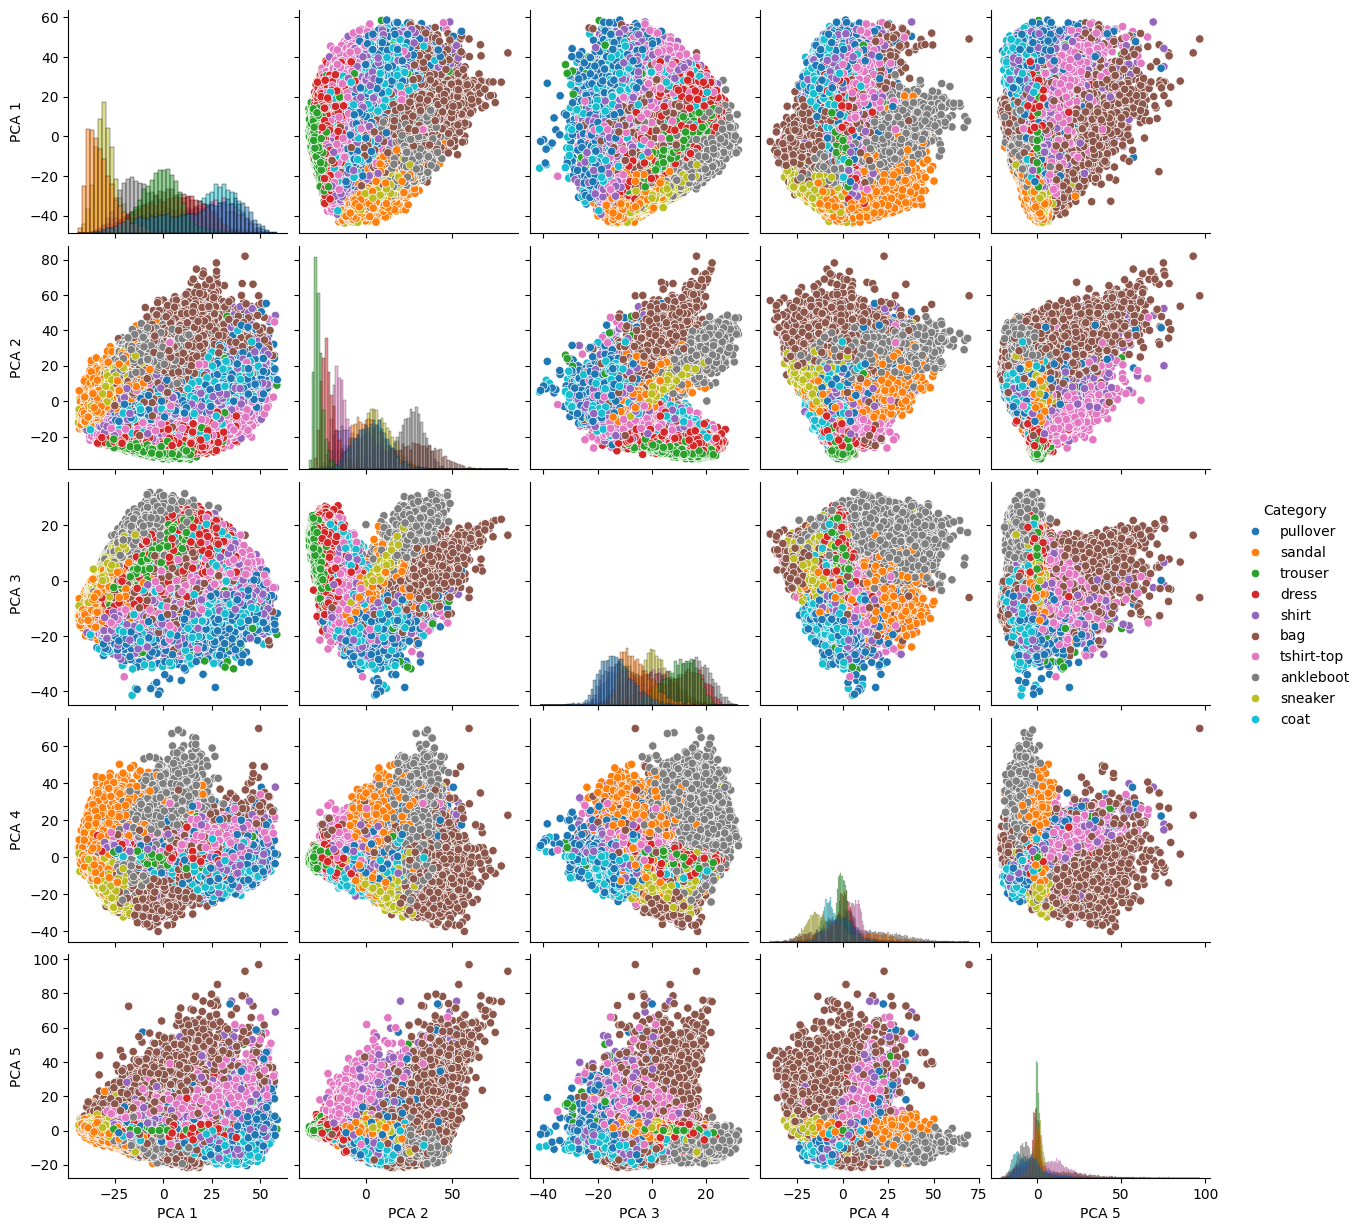

In [93]:
# Convert first 5 PCA components + category labels to DataFrame for SVM
df_pca_svm = pd.DataFrame(X_train_pca_svm[:, :5], columns=[f"PCA {i+1}" for i in range(5)])

# Convert numeric labels to category names
df_pca_svm["Category"] = [categories[label] for label in y_train_svm[:len(df_pca_svm)]]

# Create pairplot with correct labels for SVM PCA
sns.pairplot(df_pca_svm, hue="Category", diag_kind="hist", palette="tab10")

In [120]:
# Compute variance of each PCA component for SVM PCA
pca_variances_svm = np.var(X_train_pca_svm, axis=0)

# Print variance for first 5 components for SVM PCA
for i in range(5):
    print(f"PCA {i+1} Variance (SVM PCA): {pca_variances_svm[i]:.4f}")

PCA 1 Variance (SVM PCA): 538.7381
PCA 2 Variance (SVM PCA): 355.3404
PCA 3 Variance (SVM PCA): 132.8817
PCA 4 Variance (SVM PCA): 126.5082
PCA 5 Variance (SVM PCA): 100.4146


In [110]:
print(f"Original shape: {X_train_svm.shape}")
print(f"PCA-transformed shape: {X_train_pca_svm.shape}")  # Should be (samples, 135)


Original shape: (49000, 2304)
PCA-transformed shape: (49000, 135)


In [111]:
explained_variance = np.sum(pca_svm.explained_variance_ratio_)
print(f"Total explained variance (SVM PCA): {explained_variance:.4f}")


Total explained variance (SVM PCA): 0.9266


In [112]:
print(f"Mean after scaling: {np.mean(X_train_scaled_svm):.4f}")
print(f"Std after scaling: {np.std(X_train_scaled_svm):.4f}")


Mean after scaling: -0.0000
Std after scaling: 1.0000


In [84]:
# Use Student ID G00409920 (without G and leading 0s) as random seed
student_id = 409920
np.random.seed(student_id)

# Split dataset into train (70%) and other (30%)
X_train, X_other, y_train, y_other = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=student_id
)

In [85]:
# Fit PCA **only on training data**
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Transform the remaining dataset
X_other_pca = pca.transform(X_other)

In [86]:
# Split other into validation (15%) and test (15%)
X_valid_pca, X_test_pca, y_valid, y_test = train_test_split(
    X_other_pca, y_other, test_size=0.5, stratify=y_other, random_state=student_id
)

# Print number of components retained
print(f"Number of PCA components retained: {pca.n_components_}")

Number of PCA components retained: 135


In [87]:
# Print the dataset sizes after PCA transformation
print(f"Training set: {X_train_pca.shape[0]} samples, {X_train_pca.shape[1]} PCA components")
print(f"Validation set: {X_valid_pca.shape[0]} samples, {X_valid_pca.shape[1]} PCA components")
print(f"Test set: {X_test_pca.shape[0]} samples, {X_test_pca.shape[1]} PCA components")


Training set: 49000 samples, 135 PCA components
Validation set: 10500 samples, 135 PCA components
Test set: 10500 samples, 135 PCA components


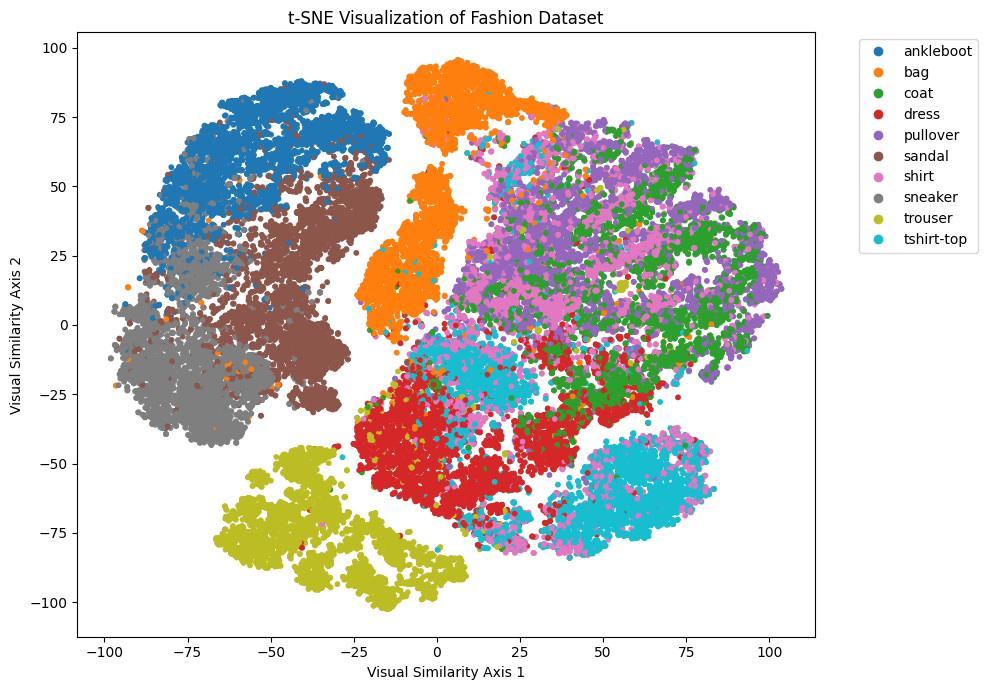

In [ ]:
# Reduce General PCA data to 2D with t-SNE
subset_size = 49000
X_subset = X_train_pca[:subset_size]
y_subset = y_train[:subset_size]

tsne = TSNE(n_components=2, random_state=student_id, perplexity=30)
X_tsne = tsne.fit_transform(X_subset)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', s=10)

# Legend
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=categories, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("t-SNE Visualization of Fashion Dataset")
plt.xlabel("Visual Similarity Axis 1")
plt.ylabel("Visual Similarity Axis 2")
plt.tight_layout()
plt.show()

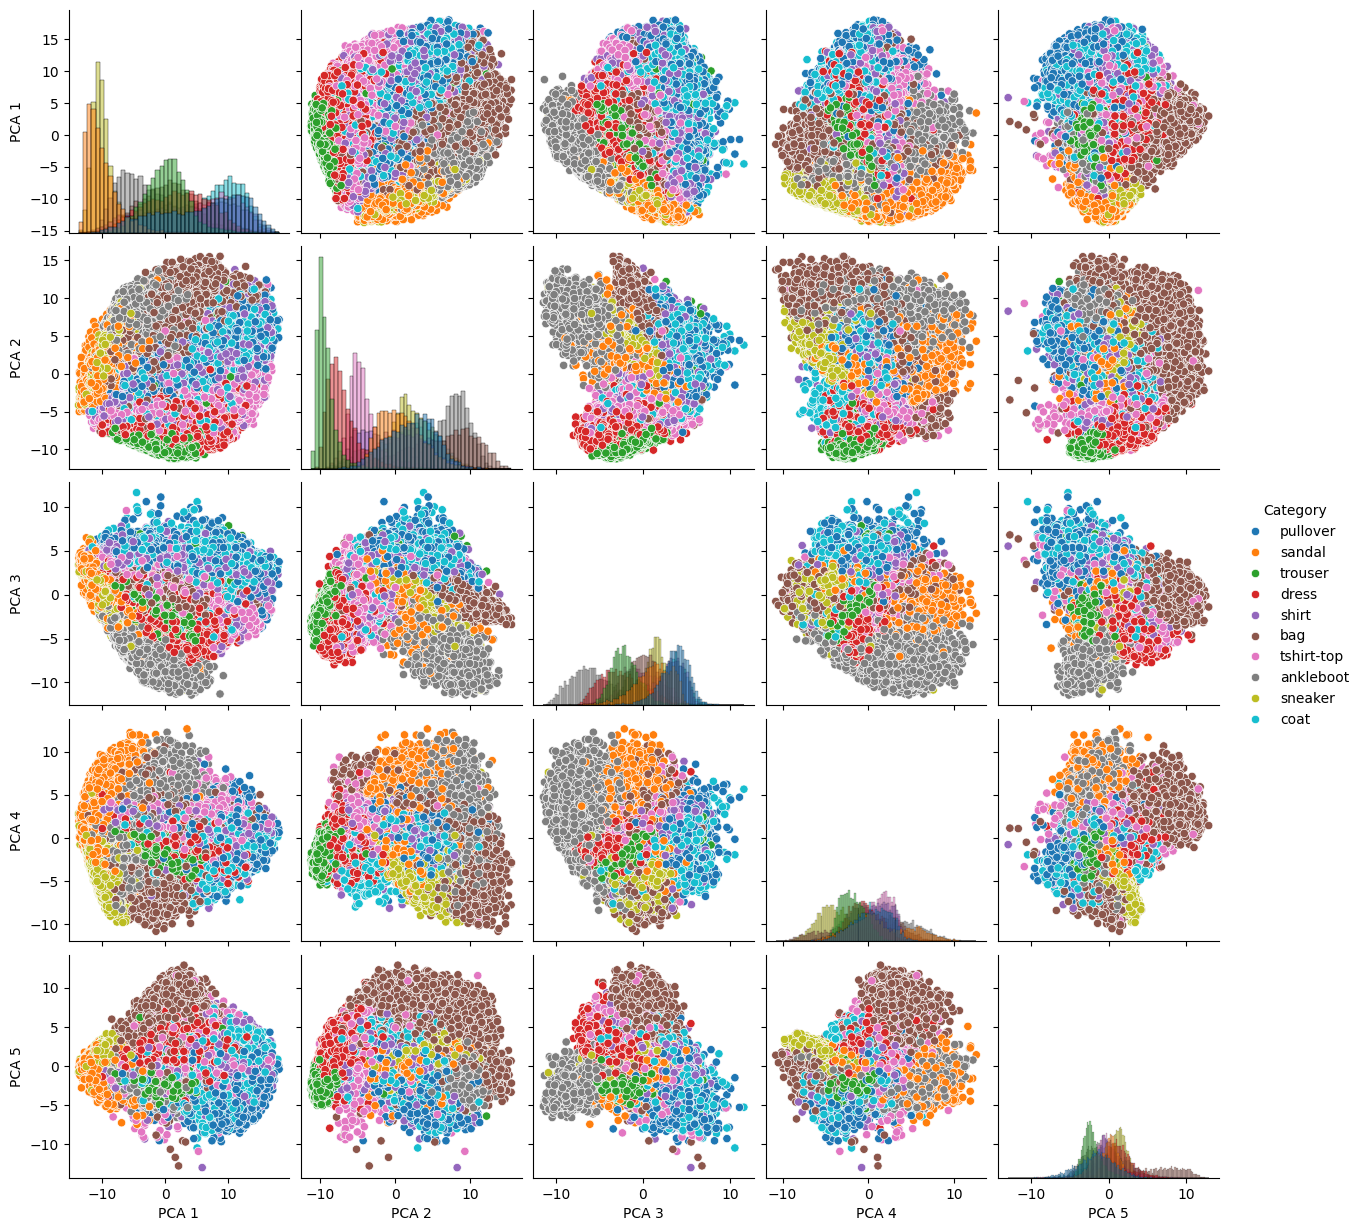

In [92]:
# Convert first 5 PCA components + category labels to DataFrame
df_pca = pd.DataFrame(X_train_pca[:, :5], columns=[f"PCA {i+1}" for i in range(5)])

# Convert numeric labels to category names
df_pca["Category"] = [categories[label] for label in y_train[:len(df_pca)]]

# Create pairplot with correct labels
sns.pairplot(df_pca, hue="Category", diag_kind="hist", palette="tab10")


In [ ]:
# Compute variance of each PCA component
pca_variances = np.var(X_train_pca, axis=0)

# Print variance for first 5 components
for i in range(5):
    print(f"PCA {i+1} Variance: {pca_variances[i]:.4f}")


PCA 1 Variance: 57.8479
PCA 2 Variance: 35.2826
PCA 3 Variance: 11.8453
PCA 4 Variance: 9.8377
PCA 5 Variance: 7.5065


## **Step 5: Training the Models**

### **Training and Evaluating SVM**

In [ ]:
# Param grid for manual looping
param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],  
    "gamma": [0.1, 0.01]
}

cv = KFold(n_splits=5, shuffle=True, random_state=student_id)

best_combo = None
best_mean_acc = 0.0

# Create combinations but only use gamma for rbf
all_combos = [
    (kernel, c, gamma) 
    for kernel in param_grid["kernel"]
    for c in param_grid["C"]
    for gamma in (param_grid["gamma"] if kernel == "rbf" else [None])  # Skip gamma for 'linear'
]

for kernel_type, c_val, gamma_val in all_combos:
    svm_model = SVC(
        kernel=kernel_type,
        C=c_val,
        gamma=gamma_val if kernel_type == "rbf" else "auto", 
        class_weight="balanced",
        random_state=student_id
    )
    
    # 5-fold CV with parallel processing
    scores = cross_val_score(svm_model, X_train_pca_svm, y_train_svm, cv=cv, n_jobs=-1)
    mean_acc = scores.mean()
    std_acc = scores.std()
    
    print(f"Kernel='{kernel_type}', C={c_val}, gamma={gamma_val}")
    print(f"  Fold Accuracies = {scores}")
    print(f"  Mean = {mean_acc:.4f} ± {std_acc:.4f}\n")
    
    # Track the best combo
    if mean_acc > best_mean_acc:
        best_mean_acc = mean_acc
        best_combo = (kernel_type, c_val, gamma_val)

print(f"Best combo: kernel='{best_combo[0]}', C={best_combo[1]}, gamma={best_combo[2]} (Mean CV={best_mean_acc:.4f})")

In [123]:
# Param grid for manual looping
param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],  
    "gamma": [0.1, 0.01]
}

cv = KFold(n_splits=5, shuffle=True, random_state=student_id)

best_combo = None
best_mean_acc = 0.0

# Create combinations but only use gamma for rbf
all_combos = [
    (kernel, c, gamma) 
    for kernel in param_grid["kernel"]
    for c in param_grid["C"]
    for gamma in (param_grid["gamma"] if kernel == "rbf" else [None])
]

for kernel_type, c_val, gamma_val in all_combos:
    svm_model = SVC(
        kernel=kernel_type,
        C=c_val,
        gamma=gamma_val if kernel_type == "rbf" else "auto", 
        class_weight="balanced",
        random_state=student_id
    )
    
    # 5-fold CV with parallel processing, using normal PCA data
    scores = cross_val_score(svm_model, X_train_pca, y_train, cv=cv, n_jobs=-1)
    mean_acc = scores.mean()
    std_acc = scores.std()
    
    print(f"Kernel='{kernel_type}', C={c_val}, gamma={gamma_val}")
    print(f"  Fold Accuracies = {scores}")
    print(f"  Mean = {mean_acc:.4f} ± {std_acc:.4f}\n")
    
    # Track the best combo
    if mean_acc > best_mean_acc:
        best_mean_acc = mean_acc
        best_combo = (kernel_type, c_val, gamma_val)

print(f"Best combo: kernel='{best_combo[0]}', C={best_combo[1]}, gamma={best_combo[2]} (Mean CV={best_mean_acc:.4f})")


Kernel='linear', C=0.1, gamma=None
  Fold Accuracies = [0.85938776 0.86612245 0.8555102  0.8594898  0.86459184]
  Mean = 0.8610 ± 0.0039

Kernel='linear', C=1, gamma=None
  Fold Accuracies = [0.85887755 0.86642857 0.85316327 0.85826531 0.86255102]
  Mean = 0.8599 ± 0.0044

Kernel='linear', C=10, gamma=None
  Fold Accuracies = [0.85571429 0.86408163 0.85285714 0.85714286 0.86112245]
  Mean = 0.8582 ± 0.0040

Kernel='rbf', C=0.1, gamma=0.1
  Fold Accuracies = [0.36336735 0.38244898 0.36734694 0.36877551 0.37255102]
  Mean = 0.3709 ± 0.0065

Kernel='rbf', C=0.1, gamma=0.01
  Fold Accuracies = [0.85438776 0.86091837 0.85489796 0.86183673 0.85744898]
  Mean = 0.8579 ± 0.0030

Kernel='rbf', C=1, gamma=0.1
  Fold Accuracies = [0.73877551 0.75040816 0.73969388 0.74683673 0.74438776]
  Mean = 0.7440 ± 0.0044

Kernel='rbf', C=1, gamma=0.01
  Fold Accuracies = [0.89336735 0.89418367 0.88765306 0.89959184 0.89397959]
  Mean = 0.8938 ± 0.0038

Kernel='rbf', C=10, gamma=0.1
  Fold Accuracies = [0.75

In [127]:
# Extract best hyperparameters from cross-validation
best_kernel, best_c, best_gamma = best_combo

# Train final SVM model using best parameters
final_svm = SVC(
    kernel=best_kernel, 
    C=best_c, 
    gamma=best_gamma, 
    class_weight="balanced", 
    random_state=student_id
)
final_svm.fit(X_train_pca, y_train)  # Use normal PCA-transformed training data

# Evaluate on validation set
val_acc = final_svm.score(X_valid_pca, y_valid)

print(f"Final Model (kernel='{best_kernel}', C={best_c}, gamma={best_gamma})")
print(f"Validation Accuracy: {val_acc:.4f}")

Final Model (kernel='rbf', C=10, gamma=0.01)
Validation Accuracy: 0.9066


In [128]:
# Evaluate on test set
svm_test_acc = final_svm.score(X_test_pca, y_test)
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")

SVM Test Accuracy: 0.9072


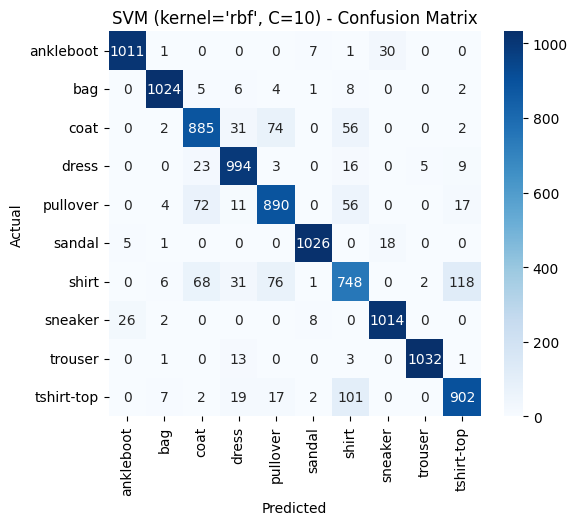

In [130]:
# Create Confusion Matrix for SVM
y_test_pred_svm = final_svm.predict(X_test_pca)

cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"SVM (kernel='{best_kernel}', C={best_c}) - Confusion Matrix")
plt.show()

In [131]:
# Print Classification Report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_test_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1050
           1       0.98      0.98      0.98      1050
           2       0.84      0.84      0.84      1050
           3       0.90      0.95      0.92      1050
           4       0.84      0.85      0.84      1050
           5       0.98      0.98      0.98      1050
           6       0.76      0.71      0.73      1050
           7       0.95      0.97      0.96      1050
           8       0.99      0.98      0.99      1050
           9       0.86      0.86      0.86      1050

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



### **Training and Evaluating KNN**

In [132]:
# Define K-Fold with shuffling
cv = KFold(n_splits=5, shuffle=True, random_state=student_id)

# Define range of k values to test
k_values = list(range(1, 16))

# Store mean accuracy for each k
mean_accuracies = []

# Perform 5-fold cross-validation for each k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_pca, y_train, cv=cv)
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"k={k}, Mean Accuracy: {mean_accuracy:.4f}")

k=1, Mean Accuracy: 0.8476
k=2, Mean Accuracy: 0.8409
k=3, Mean Accuracy: 0.8543
k=4, Mean Accuracy: 0.8548
k=5, Mean Accuracy: 0.8589
k=6, Mean Accuracy: 0.8582
k=7, Mean Accuracy: 0.8586
k=8, Mean Accuracy: 0.8572
k=9, Mean Accuracy: 0.8580
k=10, Mean Accuracy: 0.8579
k=11, Mean Accuracy: 0.8577
k=12, Mean Accuracy: 0.8567
k=13, Mean Accuracy: 0.8556
k=14, Mean Accuracy: 0.8554
k=15, Mean Accuracy: 0.8541


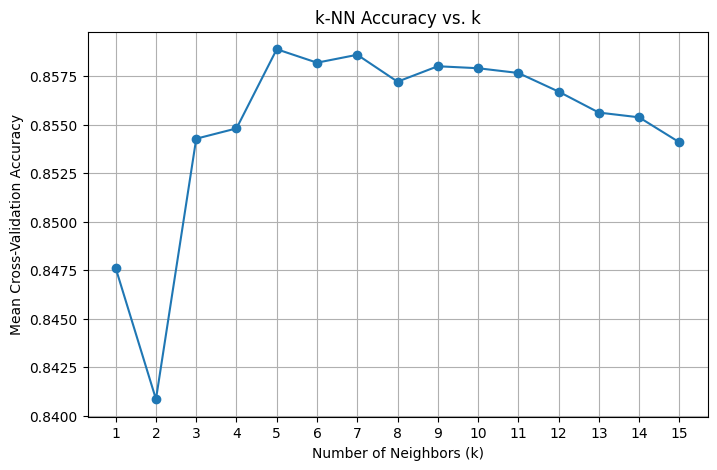


Best k based on cross-validation: 5


In [133]:
# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("k-NN Accuracy vs. k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best k value based on highest accuracy
best_k = k_values[np.argmax(mean_accuracies)]
print(f"\nBest k based on cross-validation: {best_k}")

In [135]:
# Train final KNN model using best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_pca, y_train)

# Evaluate on validation set
y_valid_pred = knn_model.predict(X_valid_pca)
knn_valid_accuracy = accuracy_score(y_valid, y_valid_pred)

print(f"KNN Validation Accuracy: {knn_valid_accuracy:.4f}")

KNN Validation Accuracy: 0.8605


In [136]:
# Evaluate on test set
y_test_pred_knn = knn_model.predict(X_test_pca)
knn_test_accuracy = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

KNN Test Accuracy: 0.8668


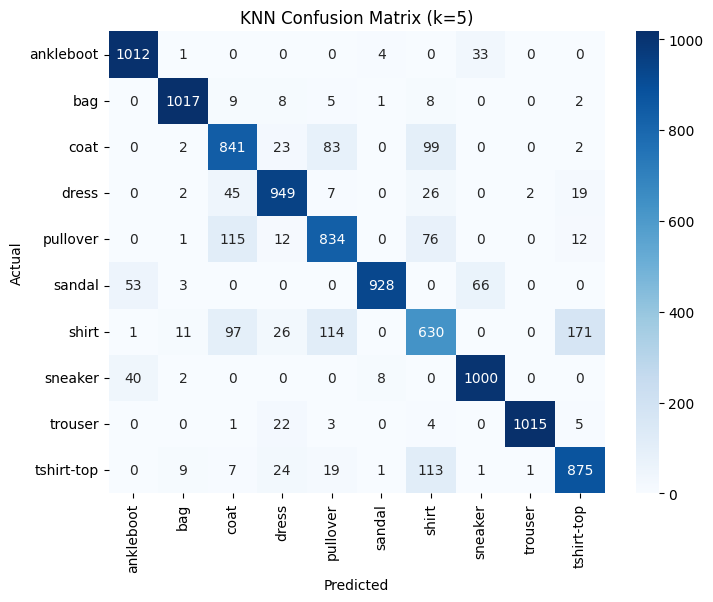

In [137]:
# Compute confusion matrix for KNN
cm = confusion_matrix(y_test, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()

In [138]:
# Print classification report
print(f"KNN Classification Report (k={best_k}):")
print(classification_report(y_test, y_test_pred_knn))

KNN Classification Report (k=5):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1050
           1       0.97      0.97      0.97      1050
           2       0.75      0.80      0.78      1050
           3       0.89      0.90      0.90      1050
           4       0.78      0.79      0.79      1050
           5       0.99      0.88      0.93      1050
           6       0.66      0.60      0.63      1050
           7       0.91      0.95      0.93      1050
           8       1.00      0.97      0.98      1050
           9       0.81      0.83      0.82      1050

    accuracy                           0.87     10500
   macro avg       0.87      0.87      0.87     10500
weighted avg       0.87      0.87      0.87     10500



### **Training and Evaluating Random Forest**

In [139]:
# Define optimized hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=student_id, n_jobs=-1)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2
)

# Fit GridSearchCV on training data
grid_search.fit(X_train_pca, y_train)

# Print best parameters and accuracy
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8656


In [ ]:
# Retrieve the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Train the best model on the full training set
best_rf_model.fit(X_train_pca, y_train)

# Evaluate on validation set
y_valid_pred_random_forest = best_rf_model.predict(X_valid_pca)
rf_valid_accuracy = accuracy_score(y_valid, y_valid_pred_random_forest)
print(f"Random Forest Validation Accuracy: {rf_valid_accuracy:.4f}")

Random Forest Validation Accuracy: 0.8677


In [ ]:
# Evaluate on test set
y_test_pred_random_forest = best_rf_model.predict(X_test_pca)
random_forest_test_accuracy = accuracy_score(y_test, y_test_pred_random_forest)
print(f"Random Forest Test Accuracy: {random_forest_test_accuracy:.4f}")

Random Forest Test Accuracy: 0.8665


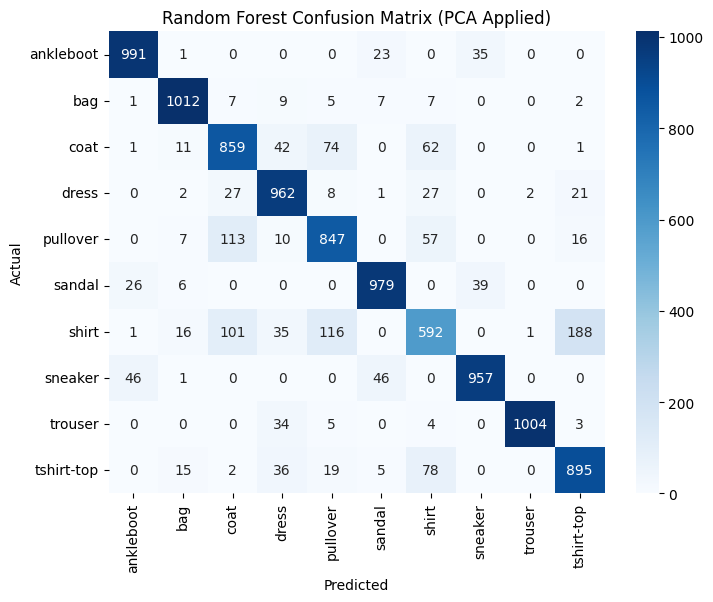

In [142]:
# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_random_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix (PCA Applied)")
plt.show()

In [143]:
# Print classification report for Random Forest
print("Random Forest Classification Report (PCA Applied):")
print(classification_report(y_test, y_test_pred_random_forest))

Random Forest Classification Report (PCA Applied):
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1050
           1       0.94      0.96      0.95      1050
           2       0.77      0.82      0.80      1050
           3       0.85      0.92      0.88      1050
           4       0.79      0.81      0.80      1050
           5       0.92      0.93      0.93      1050
           6       0.72      0.56      0.63      1050
           7       0.93      0.91      0.92      1050
           8       1.00      0.96      0.98      1050
           9       0.79      0.85      0.82      1050

    accuracy                           0.87     10500
   macro avg       0.86      0.87      0.86     10500
weighted avg       0.86      0.87      0.86     10500



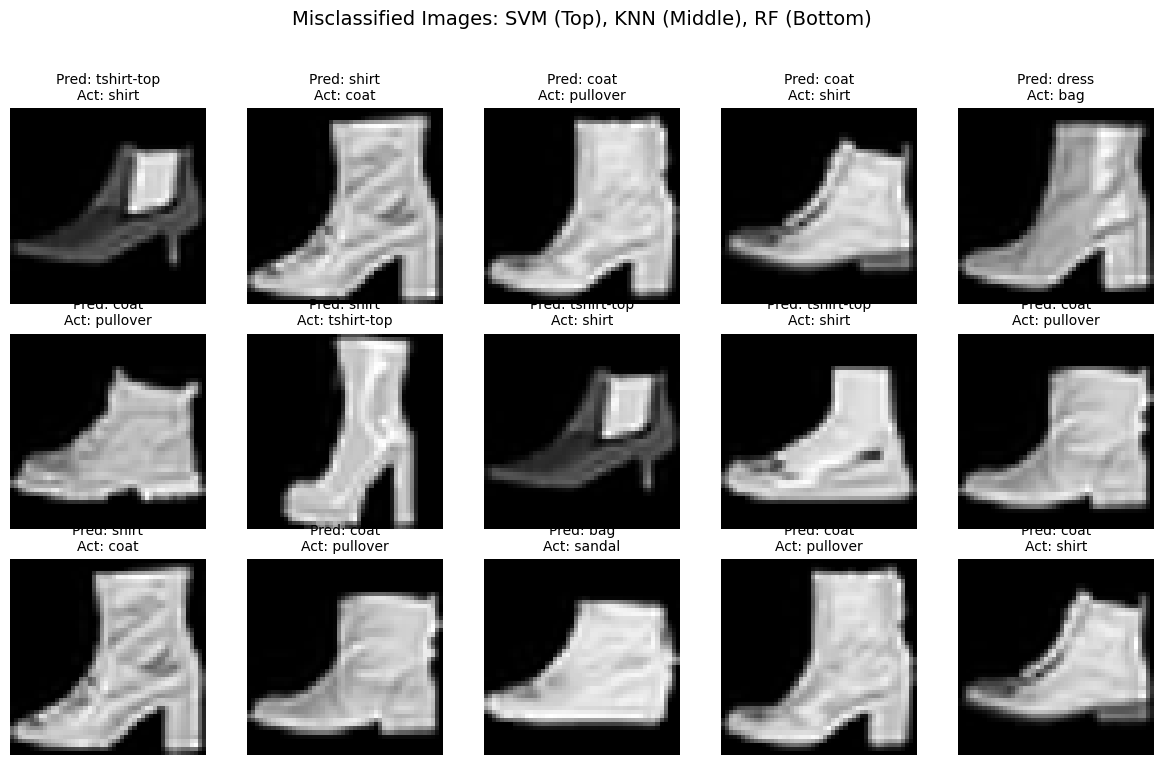

In [ ]:
# Find misclassified indices for each model
misclassified_idxs_svm = np.where(y_test != y_test_pred_svm)[0]
misclassified_idxs_knn = np.where(y_test != y_test_pred_knn)[0]
misclassified_idxs_rf = np.where(y_test != y_test_pred_random_forest)[0]  # Corrected to match RF variable

# Define number of images per model (5 per row)
num_images = 5

# Set up figure with 3 rows (one for each model)
fig, axes = plt.subplots(3, num_images, figsize=(12, 8))
fig.suptitle("Misclassified Images: SVM (Top), KNN (Middle), RF (Bottom)", fontsize=14)

# Helper function to plot misclassified images
def plot_misclassified(ax_row, misclassified_idxs, y_pred, title):
    for col in range(num_images):
        if col < len(misclassified_idxs):
            idx = misclassified_idxs[col]
            original_image = X[idx].reshape(image_size)
            ax_row[col].imshow(original_image, cmap="gray")
            ax_row[col].set_title(f"Pred: {categories[y_pred[idx]]}\nAct: {categories[y_test[idx]]}", fontsize=10)
            ax_row[col].axis("off")

# Plot misclassified images per model
plot_misclassified(axes[0], misclassified_idxs_svm, y_test_pred_svm, "SVM")
plot_misclassified(axes[1], misclassified_idxs_knn, y_test_pred_knn, "KNN")
plot_misclassified(axes[2], misclassified_idxs_rf, y_test_pred_random_forest, "Random Forest") 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


In [145]:

# Ensure category names are dynamically retrieved from the dataset
categories = np.array(os.listdir(dataset_path))

# Get classification reports as dictionaries
report_svm = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_knn = classification_report(y_test, y_test_pred_knn, output_dict=True)
report_rf = classification_report(y_test, y_test_pred_random_forest, output_dict=True)

# Extract recall values and round to whole numbers
misclassification_svm = [round((1 - report_svm[str(i)]['recall']) * 100) for i in range(len(categories))]
misclassification_knn = [round((1 - report_knn[str(i)]['recall']) * 100) for i in range(len(categories))]
misclassification_rf = [round((1 - report_rf[str(i)]['recall']) * 100) for i in range(len(categories))]

# Create a DataFrame for misclassification comparison
misclassification_df = pd.DataFrame({
    "Category": categories, 
    "SVM Misclassification (%)": misclassification_svm,
    "KNN Misclassification (%)": misclassification_knn,
    "Random Forest Misclassification (%)": misclassification_rf
})

# Display the updated table in Jupyter Notebook
misclassification_df


Category  SVM Misclassification (%)  KNN Misclassification (%)  \
0   ankleboot                          4                          4   
1         bag                          2                          3   
2        coat                         16                         20   
3       dress                          5                         10   
4    pullover                         15                         21   
5      sandal                          2                         12   
6       shirt                         29                         40   
7     sneaker                          3                          5   
8     trouser                          2                          3   
9  tshirt-top                         14                         17   

   Random Forest Misclassification (%)  
0                                    6  
1                                    4  
2                                   18  
3                                    8  
4                                   19  
5                                    7  
6                                   44  
7                                    9  
8                                    4  
9                                   15

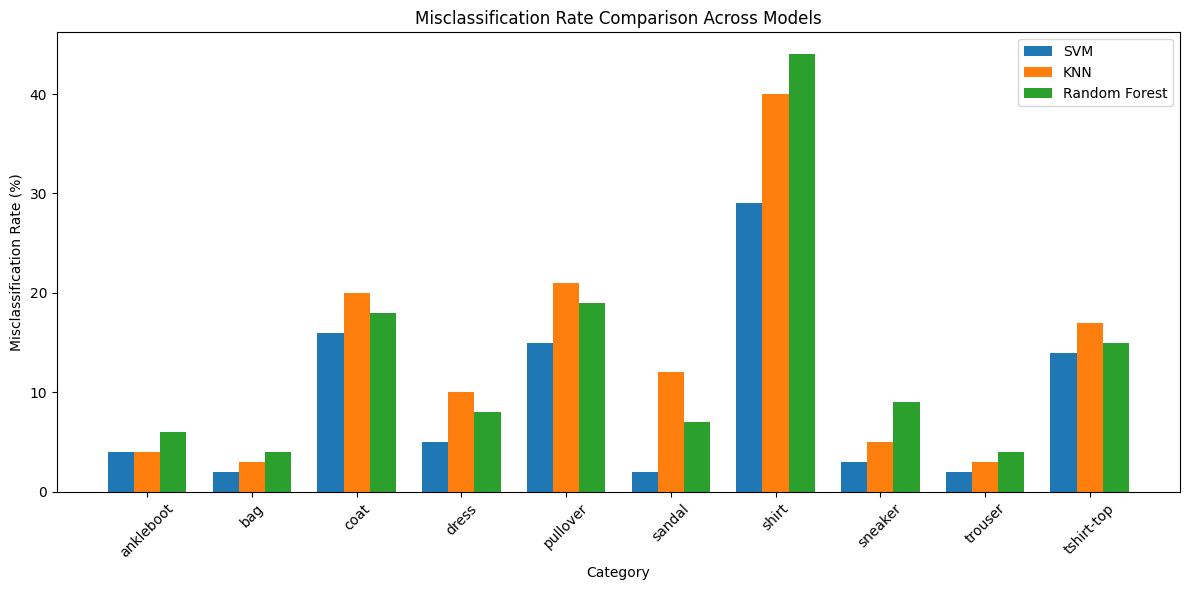

In [146]:
# Ensure category names are dynamically retrieved from the dataset
categories = np.array(os.listdir(dataset_path))
categories = sorted(categories)

# Extract recall values (misclassification = 1 - recall) and round to whole numbers
misclassification_svm = np.array([round((1 - report_svm[str(i)]['recall']) * 100) for i in range(len(categories))])
misclassification_knn = np.array([round((1 - report_knn[str(i)]['recall']) * 100) for i in range(len(categories))])
misclassification_rf = np.array([round((1 - report_rf[str(i)]['recall']) * 100) for i in range(len(categories))])

# Define bar width
bar_width = 0.25
index = np.arange(len(categories))

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(index, misclassification_svm, bar_width, label="SVM")
plt.bar(index + bar_width, misclassification_knn, bar_width, label="KNN")
plt.bar(index + 2 * bar_width, misclassification_rf, bar_width, label="Random Forest")

# Labeling
plt.xlabel("Category")
plt.ylabel("Misclassification Rate (%)")
plt.title("Misclassification Rate Comparison Across Models")
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
